In [1]:
print("Hello world")

Hello world


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:


print(5*6)

30


In [5]:
#this is colab notebook

In [6]:
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"


End to end multi class dog breed classification
this note book multi class image classifier using tenserflow 2.0

##1 .problem
identifyting the bread of the dog

##2.data
https://www.kaggle.com/c/dog-breed-identification/data

##3.evaluation
the evaluation is with prediction probs with each probs
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

##4.features

*we are dealing with images(unstuctured data) we should like to use deep leranning / transfer leraning

*there are 120 dog breads to identify
*there around 100000 + images training set
*there around 100000+ images in test set



#get our workspace ready

*import tensrflow 2.x

*import tenserflow hub

*make sure using gpu

In [7]:
#import tenserflow into colab
#import necessory tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version :",tf.__version__)
print("TF Version :",hub.__version__)

#check for the gpu availability
print("GPU","availabile(Yes !!!)" if tf.config.list_physical_devices("GPU") else "not available ")

TF Version : 2.4.1
TF Version : 0.12.0
GPU availabile(Yes !!!)


In [8]:
#import TF 2.X
#try:
#%tensflow_vesriononly exixsts in colab
#%tensflow_version 2.x
#except Exception:
#pass

In [9]:
#getting our data ready

#with all ml modules all the data need to be at numerical format. turning data in to numbers

#lets start by accesing our daa and checking ou the labels

In [10]:
#checkout labels of our data
import pandas as pd
labels_csv =pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head() )


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     151f312fa21196af9b53b0e77baa3a06  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [11]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


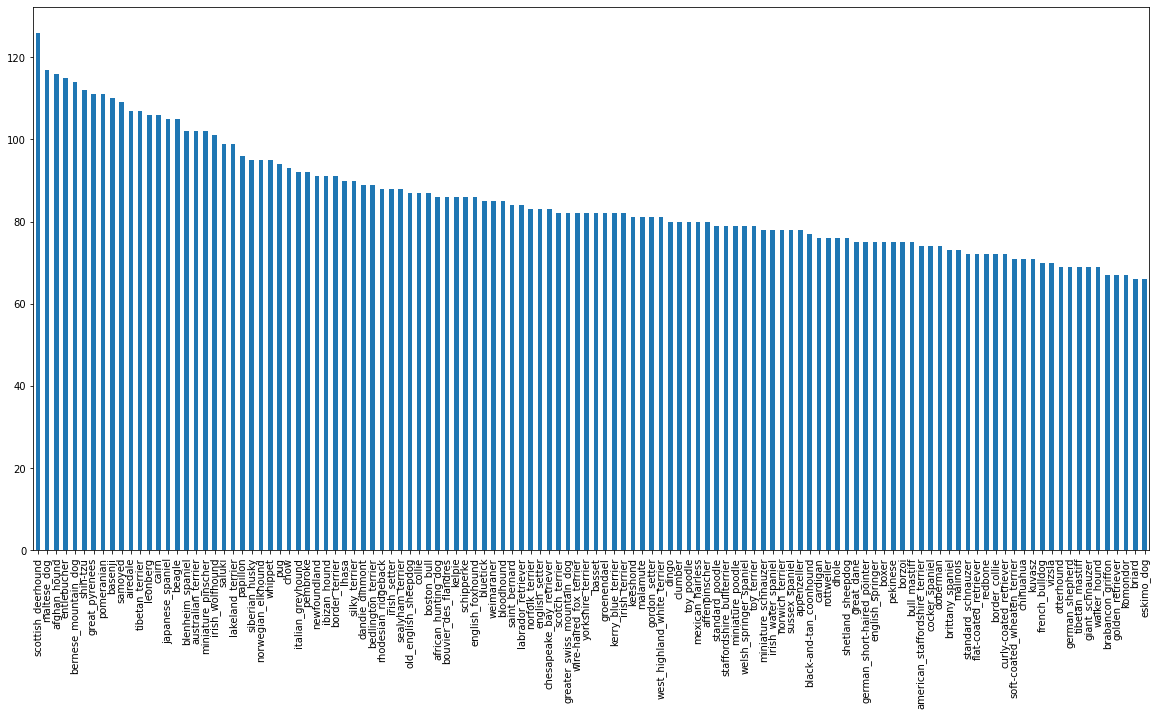

In [12]:
#how many images are for a breed

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [13]:
labels_csv["breed"].value_counts().median()

82.0

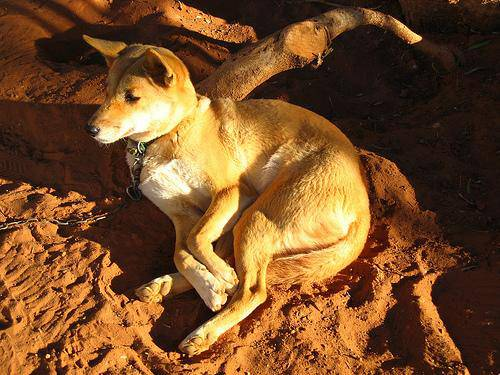

In [14]:
#lets view an image

from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [15]:
#getting image sand their labels

#lets get the image from the path names

In [16]:
#crraete path names from image ID'S

filenames =["drive/MyDrive/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

#check the first 10
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [17]:
import os
os.listdir("drive/MyDrive/Dog Vision/train/")[:10]

['e308be2d0ae640f51c08166b2e3ce396.jpg',
 'e5128f2c854ffaa8e53b917edd0741e9.jpg',
 'e1d53fa88060cde37192028ee3ca4629.jpg',
 'e001b6f5092b2b90501111b23ab30d12.jpg',
 'e6a62f69da66da8492120ac8107f68c1.jpg',
 'e0cfa8c273838e25d74970683b285391.jpg',
 'e0629e36f6f2f4708db4b4d68bf1a75e.jpg',
 'dd5a3c84fb3c388ecf0b4da61eaef352.jpg',
 'e7f3274adaad369068602a422e9df192.jpg',
 'e0acf08c678ede145c9824dbb7c3718e.jpg']

In [18]:
#check whether names of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/"))==len(filenames):
  print("Filenames match actual amount of files !!! Proceed")

else:
  print("Filesnames do not match actual amount of files, check the target directory ")


Filenames match actual amount of files !!! Proceed


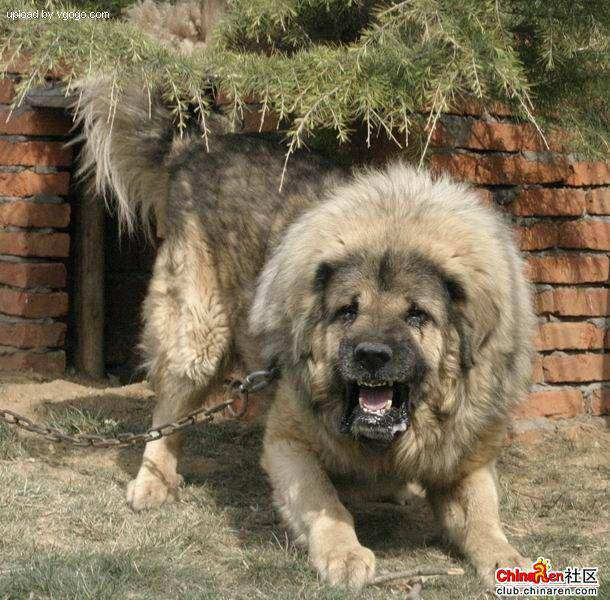

In [19]:
#one more check 
Image(filenames[9000])

In [20]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [21]:
labels =labels_csv["breed"].to_numpy()
# labels =np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
len(labels)

10222

In [23]:
#see if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")

else:
  print('Number of labels does not match nnumber of filenames, chek the dictoanry')

Number of labels matches number of filenames


In [24]:
#find the unique label values
unique_breeds =np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [25]:
labels_csv["breed"][6]

'bedlington_terrier'

In [26]:
len(unique_breeds)

120

In [27]:
#turn single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [28]:
len(labels)

10222

In [29]:
#turn every label into a boolean array
boolean_labels =[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [30]:
#example -turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [31]:
print(labels[2])
print(boolean_labels[2].astype(int))


pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [32]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Creating a own validation set
 
 *we need to create own validation set

In [33]:
#setup X and y varibales
X= filenames
y=boolean_labels



we are going to start from 1000 images and then increse at the end

In [34]:
#set number of images to used expreimenting
NUM_IMAGES =1000 #@param {type:"slider",min:1000,max:10000}

In [35]:
#lest's split the data into tarin and validation set

from sklearn.model_selection import train_test_split

#split them into tarining and validation of totl size NUM-import
X_train,X_val,y_train,y_val =train_test_split(X[:NUM_IMAGES],
                                              y[:NUM_IMAGES],
                                              test_size=0.2,
                                              random_state=42)

len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [36]:
#lets have a geesze on data
X_train[:2],y_train[:2]



(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

##Preprocessing images (turning images into tensores)

*to preprocess our images into tesores we are going to write  a fucntion which does few things

1.take an image filepath as input

2.ue tenserflow to read file and save it to a variable `image`

3.turn the image into tesors

4.noramlize the image (convert colur image values to 0-255 to 0-1)

5.resize the image to be shape of (224,224)

6.return the modiied image



In [37]:
#convert image into numpy array

from matplotlib.pyplot import imread
image =imread(filenames[42])
image.shape

(257, 350, 3)

In [38]:
image.max(),image.min()


(255, 0)

In [39]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [40]:
#turn image into tensors

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [41]:
#Define the iamge Size
IMG_SIZE=224

#create a function for preprocessing images

def process_image(image_path):
  """
  Takes the image from pat and turnn into tensors
  """
  #read the an image file
  image = tf.io.read_file(image_path)

  #turn jpg image into numercal tensor with thee colur channels(RED,GREEN,BLUE)

  image =tf.image.decode_jpeg(image,channels=3)

  #convert the colur chneel value from 0 to 255 to 0-1 values
  image =tf.image.convert_image_dtype(image,tf.float32)

  #resize the image to desired size

  image =tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image




In [44]:
 ##turning the data into batches
 #in order to use tensorflow effectively, we need our data in a form of tensor tuples .(image,label)
 

In [45]:
#create a simlpe function to return a tuple(image,label)

def get_image_label(image_path,label):
  """
  Takes an image file path name and the assiciated label, process the image and returns the tuple of (image,label)
  """

  image =process_image(image_path)
  return image,label

In [47]:
#demo of the above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we got a way to turn data into tuples and tensors in the form `(image,label)` lets make a fucntion to turn all data our data (X & y) into batches

In [52]:
#define the batch size, 32 is good
BATCH_SIZE =32

#crate fucntion to turn data into batches
def create_data_batches(X,y,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs
  shuffeles the data it its taraning data but doenot shuffle its validation data
  also accepts test data as input (no labels)
  """

  #if the data is a test dataset, we probley dont have labels
  if test_data:
    print("creating the test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))#onlt filepaths,no labels
    data_batch =data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #if the data is a valid dataset, we doe not need to shuffle this
  elif valid_data:
    print("Creating validation data batches .....")
    data =tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    data_batch =data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("craeting tarining data batches ....")
    #turn filepathes and labels into tensores

    data =tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    
    #shuffeling pathnames and labels befeore mapping image processor function is faster than shuffling images
    data =data.shuffle(buffer_size=len(X))

    #cearte image label tuples (this also truns image path into preproceed image)
    data= data.map(get_image_label)

    #turn the train data into bathes
    data_batch =data.batch(BATCH_SIZE)

  return data_batch   

In [53]:
#craete a taraiaing and validation data batches

train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)


craeting tarining data batches ....
Creating validation data batches .....


In [54]:
#Check out different attributes of the data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [55]:
#visulazing data batches

Our data is on batches, these hard to understand ,so lets visulaze them

In [66]:
import matplotlib.pyplot as plt

#craete a fucntion for viewing images in a data batch
def show_25_images(images,labels):
  
  """
  Displys a plot of 25 images and thier labels from a data batch
  """

  #setup the figure
  plt.figure(figsize =(10,10))
  
  #loop thought the 25 images
  for  i in range(25):
    #create subplots  (5 rows,5 columns)
    ax = plt.subplot(5,5,i+1)

    #display images
    plt.imshow(images[i])

    #add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

    

In [60]:
train_images,train_labels =next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

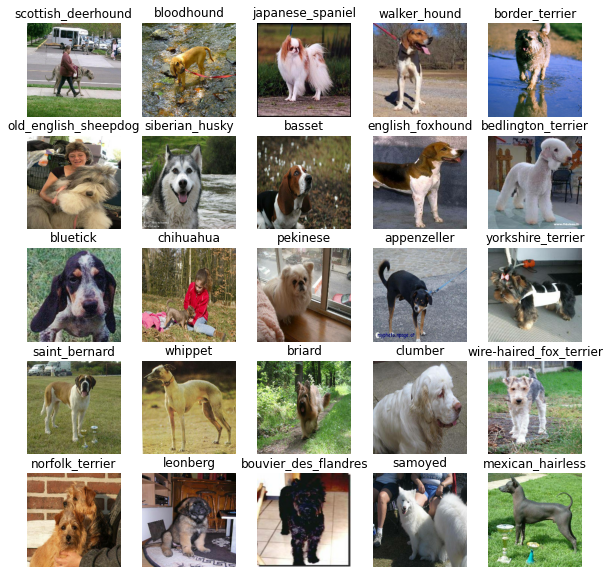

In [67]:
#now visulizeed the data in a tarining batch
show_25_images(train_images,train_labels)

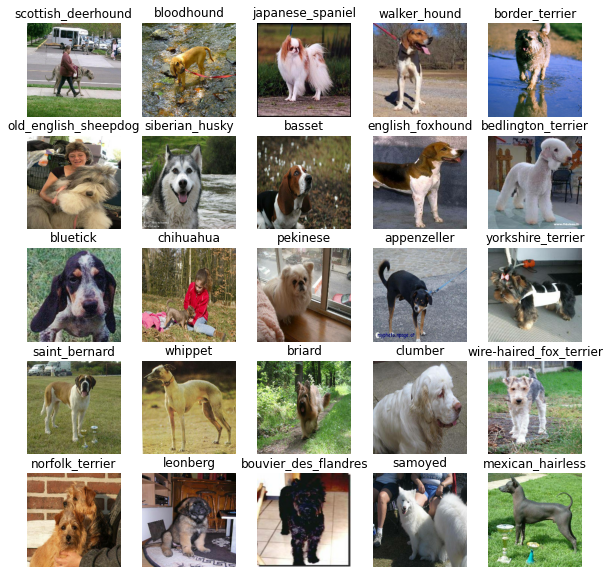

In [69]:
#now lets visulize the validation set
val_images,val_labels =next(val_data.as_numpy_iterator())
show_25_images(train_images,train_labels)